## Analysing Telco Costumer Churn data set.

Read about this dataset from [here](https://www.kaggle.com/blastchar/telco-customer-churn/version/1)

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### read data

In [2]:
churn_df = pd.read_csv("data/Telco-Customer-Churn.csv")
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
churn_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Selecting a column or a subset of columns

In [4]:
churn_df["customerID"].head(10)

0    7590-VHVEG
1    5575-GNVDE
2    3668-QPYBK
3    7795-CFOCW
4    9237-HQITU
5    9305-CDSKC
6    1452-KIOVK
7    6713-OKOMC
8    7892-POOKP
9    6388-TABGU
Name: customerID, dtype: object

In [5]:
churn_df[["customerID", "tenure", "MonthlyCharges"]].head(10)

,customerID,tenure,MonthlyCharges
0,7590-VHVEG,1,29.85
1,5575-GNVDE,34,56.95
2,3668-QPYBK,2,53.85
3,7795-CFOCW,45,42.30
4,9237-HQITU,2,70.70
5,9305-CDSKC,8,99.65
6,1452-KIOVK,22,89.10
7,6713-OKOMC,10,29.75
8,7892-POOKP,28,104.80
9,6388-TABGU,62,56.15


### data types of columns

In [6]:
churn_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### detecting the categorical features and correcting their data type

In [7]:
churn_df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [8]:
churn_df["PaymentMethod"] = churn_df["PaymentMethod"].astype("category")

In [19]:
churn_df["Churn"] = churn_df["Churn"].astype("category")
churn_df["TotalCharges"] = pd.to_numeric(churn_df["TotalCharges"], errors="coerce")

In [20]:
churn_df.dtypes

customerID            object
gender                object
SeniorCitizen          int64
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object

### Looking for missing data

In [21]:
churn_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### Summary statistics - boxplot

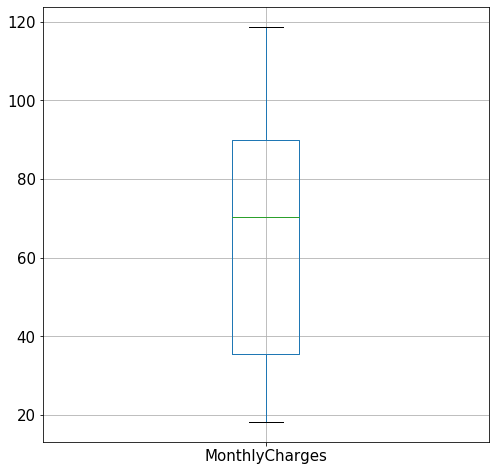

In [26]:
plt.figure(figsize=(8,8))
churn_df.boxplot(column="MonthlyCharges")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

### Histogram - categorical attribute

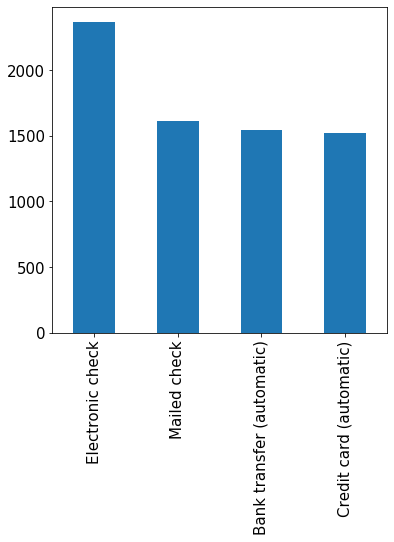

In [33]:
plt.figure(figsize=(6,6))
churn_df["PaymentMethod"].value_counts().plot(kind='bar')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

### Histogram - numerical attribute

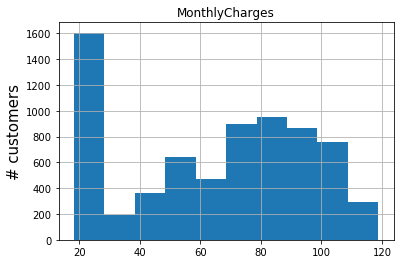

In [38]:
churn_df.hist("MonthlyCharges")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel("# customers", fontsize=15);

### pair plot

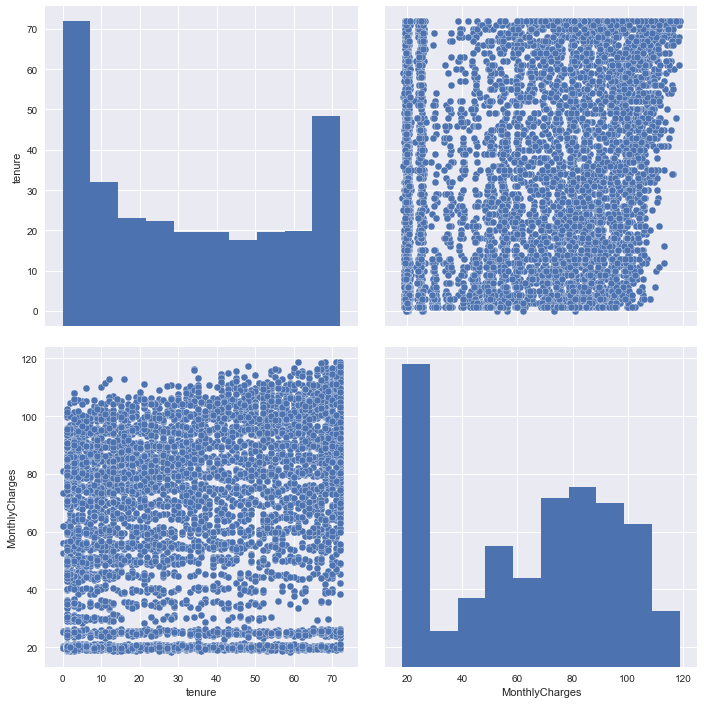

In [22]:
sns.pairplot( data=churn_df[["tenure", "MonthlyCharges"]], size=5, aspect=1);